### Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('../data/df_model_final_frequency.csv')

In [3]:
# Show summary stats
df.describe()

,uid,label,freq_P_last_1,freq_P_last_3,freq_P_last_7,freq_P_last_14,freq_P_last_30,freq_D_last_1,freq_D_last_3,freq_D_last_7,freq_D_last_14,freq_D_last_30,device_type
count,5.653500e+04,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.00000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000
mean,1.674203e+08,0.629115,2.840364,8.686743,19.483930,42.200407,114.837499,0.12318,0.326612,0.759176,1.749854,7.666224,1.870116
std,1.003699e+07,0.483046,14.460567,32.670623,61.697296,116.347127,238.391936,6.61063,7.791643,10.335602,18.579437,44.326022,0.344803
min,1.233300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.680316e+08,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.684855e+08,1.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.687740e+08,1.000000,0.000000,0.000000,7.000000,27.000000,113.000000,0.00000,0.000000,0.000000,0.000000,2.000000,2.000000
max,1.692584e+08,1.000000,916.000000,1148.000000,1504.000000,2157.000000,3762.000000,1463.00000,1463.000000,1463.000000,1590.000000,3163.000000,2.000000


In [4]:
df['device_type_1'] = (df['device_type'] == 1).astype(int)
df['device_type_2'] = (df['device_type'] == 2).astype(int)

### Define Features and Target

In [5]:
selected_features = list(df.columns.values)

In [6]:
selected_features.remove('uid')
selected_features.remove('label')
selected_features.remove('device_type')
selected_features

['freq_P_last_1',
 'freq_P_last_3',
 'freq_P_last_7',
 'freq_P_last_14',
 'freq_P_last_30',
 'freq_D_last_1',
 'freq_D_last_3',
 'freq_D_last_7',
 'freq_D_last_14',
 'freq_D_last_30',
 'device_type_1',
 'device_type_2']

In [7]:
X = df[selected_features]
y = df['label']

In [8]:
X.shape

(56535, 12)

In [9]:
y[:10]

0    0
1    1
2    1
3    0
4    0
5    1
6    1
7    0
8    1
9    1
Name: label, dtype: int64

#### Let's Train-test split the data!

In [10]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Train model using sklearn

In [11]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


### Calculate the metric scores for the model

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [13]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [14]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

### Logistic Regression

              train      test
metrics                      
AUC        0.850895  0.846501
Accuracy   0.777240  0.779163
Precision  0.753429  0.759263
Recall     0.958545  0.956383
f1-score   0.843699  0.846499


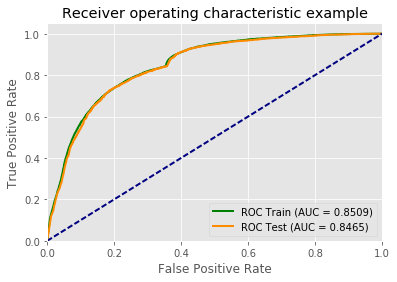

In [15]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')
# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## Bagging
### Single Tree

              train      test
metrics                      
AUC        0.911599  0.861446
Accuracy   0.857544  0.818166
Precision  0.864336  0.837511
Recall     0.916772  0.886373
f1-score   0.889782  0.861250


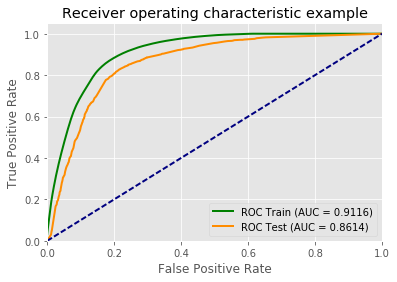

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

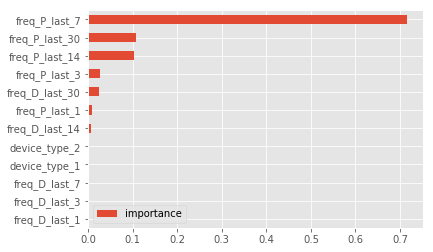

In [17]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Bagged Trees

              train      test
metrics                      
AUC        0.913925  0.877949
Accuracy   0.860684  0.827452
Precision  0.868828  0.848473
Recall     0.916208  0.887484
f1-score   0.891890  0.867540


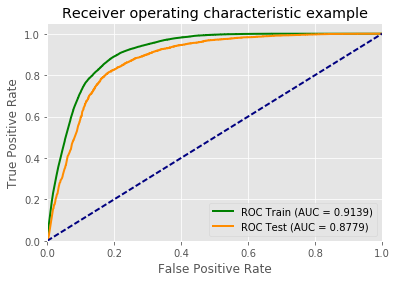

In [18]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Single KNN

              train      test
metrics                      
AUC        0.906208  0.824121
Accuracy   0.861104  0.797382
Precision  0.871493  0.825896
Recall     0.913212  0.863870
f1-score   0.891865  0.844457


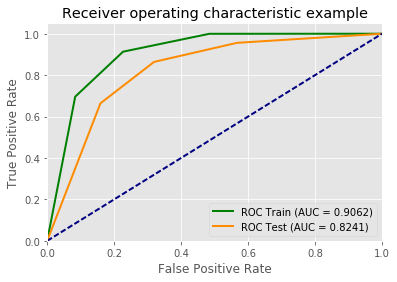

In [19]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Bagged KNN

              train      test
metrics                      
AUC        0.930627  0.848018
Accuracy   0.877222  0.807641
Precision  0.878697  0.827766
Recall     0.933058  0.881234
f1-score   0.905062  0.853663


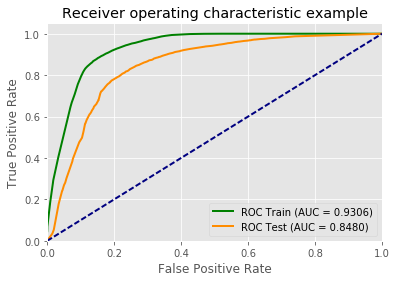

In [20]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.900220  0.882277
Accuracy   0.842177  0.832582
Precision  0.849270  0.845083
Recall     0.909863  0.902486
f1-score   0.878523  0.872842


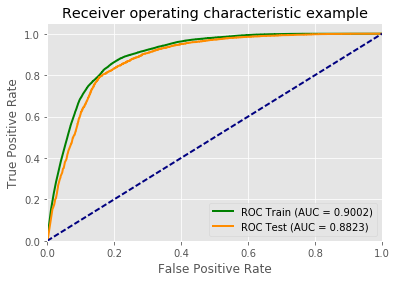

In [21]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 50,
              'max_features': 'auto',
              'criterion': 'gini',
              'max_depth': 20,
              'min_samples_split': 2,
              'min_samples_leaf': 20,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

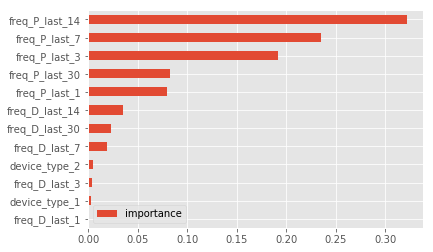

In [22]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Gradient Boosting Trees

              train      test
metrics                      
AUC        0.896269  0.882038
Accuracy   0.842354  0.830990
Precision  0.848347  0.842753
Recall     0.911626  0.903042
f1-score   0.878849  0.871857


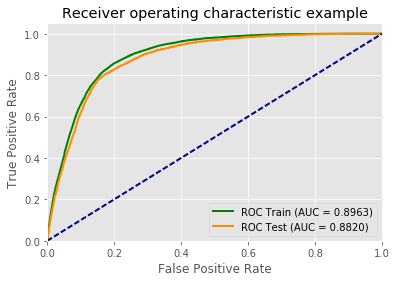

In [23]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 100,
    'max_depth': 5,
    'learning_rate': 0.1,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

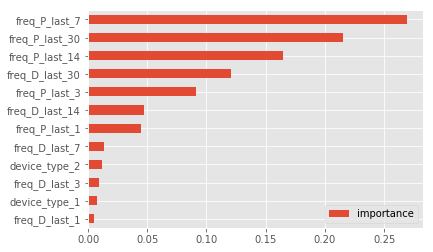

In [24]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

### Neural Network

              train      test
metrics                      
AUC        0.850053  0.844789
Accuracy   0.786349  0.787742
Precision  0.766097  0.771529
Recall     0.949168  0.947076
f1-score   0.847863  0.850337


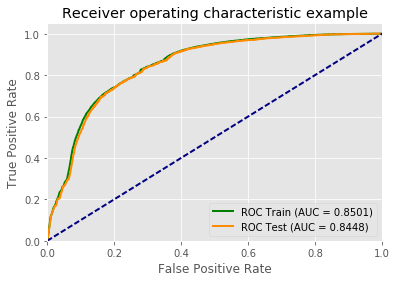

In [25]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

## SVM
### Linear SVM

              train      test
metrics                      
AUC        0.680722  0.680079
Accuracy   0.751260  0.755992
Precision  0.729883  0.737433
Recall     0.957946  0.957772
f1-score   0.828506  0.833283


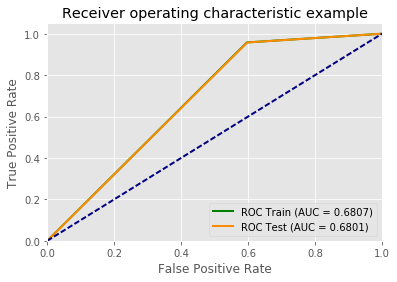

In [26]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [27]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()

AttributeError: 'LinearSVC' object has no attribute 'feature_importances_'

### NonLinear SVM

In [ ]:

# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html# http:/ 
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [ ]:
df_feature_importance = pd.DataFrame()
df_feature_importance['feature'] = selected_features
df_feature_importance['importance'] = clf.feature_importances_
df_feature_importance.sort_values('importance',inplace=True)

ax = df_feature_importance.plot.barh()
t = np.arange(len(df_feature_importance['feature']))
ax.set_yticks(t)
ax.set_yticklabels(df_feature_importance['feature'])
plt.show()